# Центральная предельная теорема своими руками 

## Programming Assignment (Week-4)

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Код и результаты

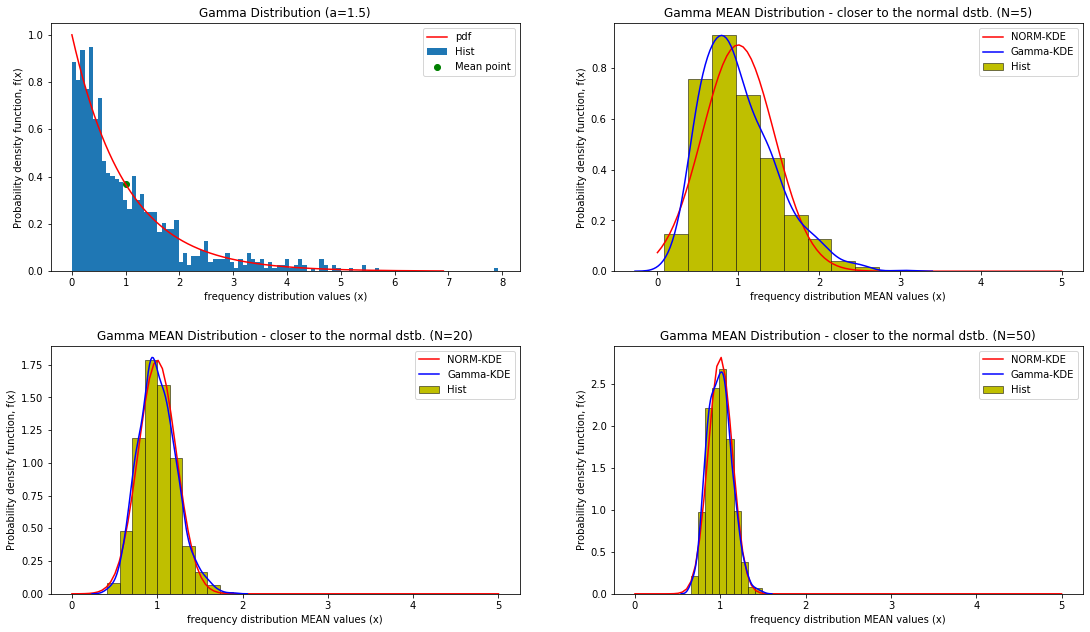

In [22]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

                                                        # Gamma distribution with alpha = 1.5 (a)
a = 1
x = np.linspace(sts.gamma.ppf(0.001, a), sts.gamma.ppf(0.999, a), 1000)  #

fig, ax = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3)
fig.set_size_inches(18.5, 10.5)

ax[0,0].plot(x, sts.gamma.pdf(x, a), "r-", label='pdf')                                 # Line plotting
ax[0,0].hist(sts.gamma.rvs(a, size=1000), 100, density=True, label='Hist')              # Hist. plotting
ax[0,0].scatter(a, sts.gamma.pdf(a, a), color='green', label='Mean point')

xx = []
n = 5
for i in range(1000):
    gval = sts.gamma.rvs(a, size=n)
    xx.append(np.mean(gval))                            # the list of mean values
sigma = np.sqrt(a/n)                                    # theoretical sigma
norm_rv = sts.norm(a,sigma)
x = np.linspace(0,5,100)
pdf = norm_rv.pdf(x)                                    # Normal distribution

ax[0,1].hist(xx, density=True, label='Hist',color='y', edgecolor='black', linewidth=0.5)           # Hist. plotting
ax[0,1].plot(x, pdf, "r-", label='NORM-KDE')                                                 # Line plotting
sns.distplot(xx, hist=False, ax=ax[0,1], color='b', label='Gamma-KDE')


xx = []
n = 20
for i in range(1000):
    gval = sts.gamma.rvs(a, size=n)
    xx.append(np.mean(gval))                            # the list of mean values
sigma = np.sqrt(a/n)                                    # theoretical sigma
norm_rv = sts.norm(a,sigma)
x = np.linspace(0,5,100)
pdf = norm_rv.pdf(x)                                    # Normal distribution

ax[1,0].hist(xx, density=True, label='Hist',color='y', edgecolor='black', linewidth=0.5)           # Hist. plotting
ax[1,0].plot(x, pdf, "r-", label='NORM-KDE')                                                 # Line plotting
sns.distplot(xx, hist=False, ax=ax[1,0], color='b', label='Gamma-KDE')

xx = []
n = 50
for i in range(1000):
    gval = sts.gamma.rvs(a, size=n)
    xx.append(np.mean(gval))                            # the list of mean values
sigma = np.sqrt(a/n)                                    # theoretical sigma
norm_rv = sts.norm(a,sigma)
x = np.linspace(0,5,100)
pdf = norm_rv.pdf(x)                                    # Normal distribution

ax[1,1].hist(xx, density=True, label='Hist',color='y', edgecolor='black', linewidth=0.5)           # Hist. plotting
ax[1,1].plot(x, pdf, "r-", label='NORM-KDE')                                                 # Line plotting
sns.distplot(xx, hist=False, ax=ax[1,1], color='b', label='Gamma-KDE')

ax[0,0].set_title('Gamma Distribution (a=1.5)')
ax[1,0].set_title('Gamma MEAN Distribution - closer to the normal dstb. (N=20)')
ax[0,1].set_title('Gamma MEAN Distribution - closer to the normal dstb. (N=5)')
ax[1,1].set_title('Gamma MEAN Distribution - closer to the normal dstb. (N=50)')

ax[0,1].set_ylabel('Probability density function, f(x)')
ax[1,0].set_ylabel('Probability density function, f(x)')
ax[1,1].set_ylabel('Probability density function, f(x)')
ax[0,0].set_ylabel('Probability density function, f(x)')

ax[0,0].set_xlabel('frequency distribution values (x)')
ax[1,0].set_xlabel('frequency distribution MEAN values (x)')
ax[1,1].set_xlabel('frequency distribution MEAN values (x)')
ax[0,1].set_xlabel('frequency distribution MEAN values (x)')

ax[0,0].legend()

plt.show()

## Выкладки с вычислениями параметров нормального распределения

Параметры гамма распределения $$k = 1$$ $$\alpha = 1.5$$
Распределение выборочных средних представляет собой нормальное распределение с параметрами: 
$$\mu = k * \alpha$$
$$\sigma^2 =(k*\alpha)/n$$ 

## Вывод

   На примере Гамма-распределения мы убедились, что распределение выборочных средних представляет собой нормальное распределение с указанными параметрами, все наглядно видно по данным графикам. 
   Было построено гистограмму данных гамма-распределения и график плотности вероятности нормального распределения при 5-10-50 объемах выборки. Можем видеть, что плотность вероятности достаточно точно оценивается, причем с ростом объема выборки точность аппроксимации улучшается.
